In [2]:
import torch
from torch.utils.data import DataLoader

import mininet
import loaders

import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = 'data/camvid'

test_data = loaders.CamvidLoader(data, 'test', False)
test_dataloader = DataLoader(test_data, batch_size=1)

train_data = loaders.CamvidLoader(data, 'train', False)
train_dataloader = DataLoader(train_data, batch_size=1)

Loaded 233 images (test)
Loaded 367 images (train)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

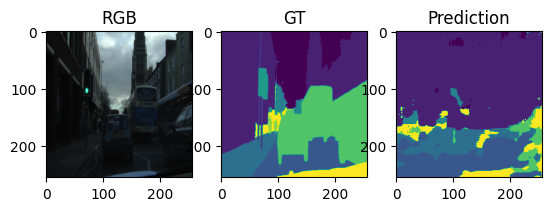

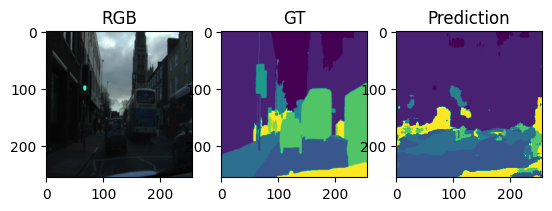

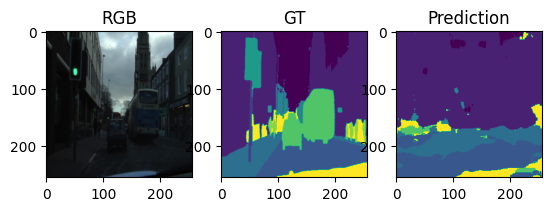

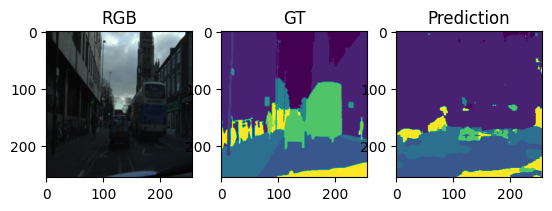

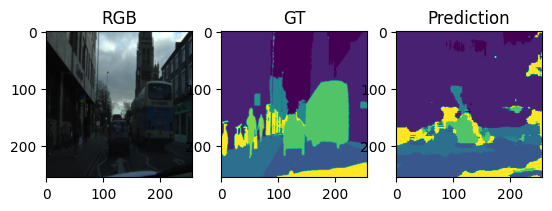

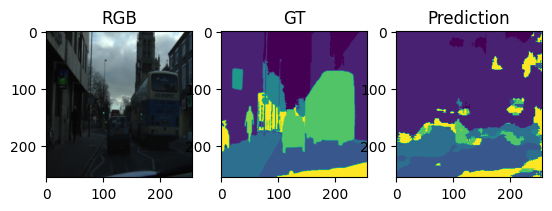

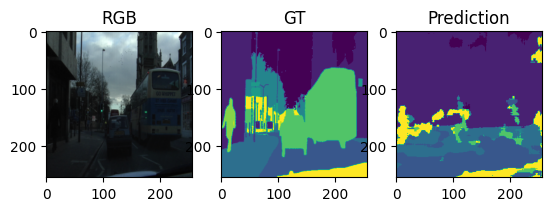

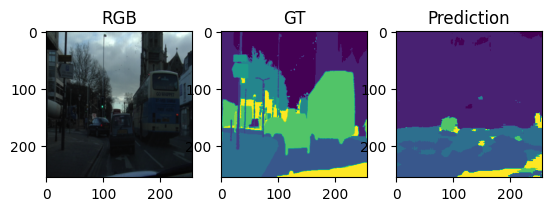

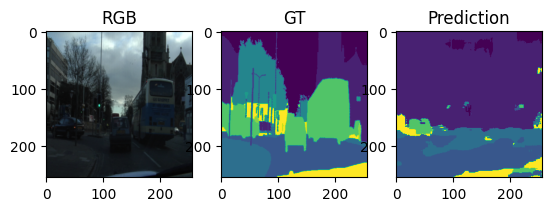

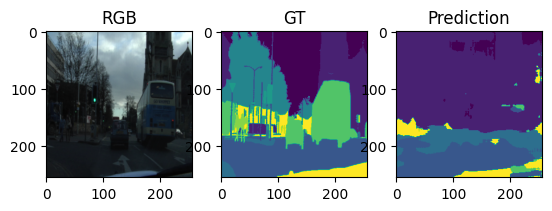

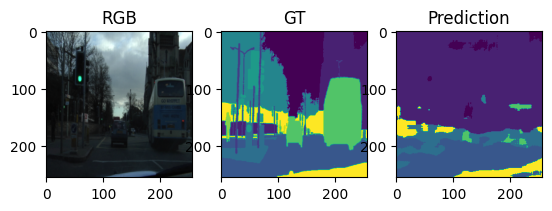

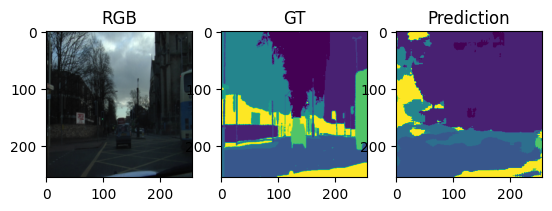

In [7]:
model = mininet.MiniNetv2(3, train_data.num_classes)

model.load_state_dict(torch.load('model.tar')['model_state_dict'])
model.eval()

with torch.no_grad():
    for i, (x, y) in enumerate(train_dataloader):
        output = model(x)
        fig, axs = plt.subplots(1, 3)
        # axs[0].imshow(x[0][[10, 120, 200]].permute(1, 2, 0))
        axs[0].imshow(x[0].permute(1, 2, 0))
        axs[1].imshow(y[0].argmax(dim=0), vmin=0, vmax=)
        axs[2].imshow(output[0].argmax(dim=0), vim=0)
        axs[0].set_title('RGB')
        axs[1].set_title('GT')
        axs[2].set_title('Prediction')
        if i > 10:
            break